# **Exploratory Data Analysis in Python using pandas**

Chanin Nantasenamat

<i>[Data Professor YouTube channel](http://youtube.com/dataprofessor), http://youtube.com/dataprofessor </i>

In this Jupyter notebook, I will be showing you how to perform Exploratory Data Analysis on web scraped data of NBA player stats as obtained in a previous [Jupyter notebook](https://github.com/dataprofessor/code/blob/master/python/pandas_read_html_for_webscraping.ipynb) as discussed on our YouTube video [Easy Web Scraping in Python using Pandas for Data Science](https://www.youtube.com/watch?v=SPu_5EfswIE).

## **Web scraping data using pandas**

The following block of code will retrieve the "2018-19 NBA Player Stats: Per Game" data from http://www.basketball-reference.com/.

In [0]:
import pandas as pd

# Retrieve HTML table data
url = 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'
html = pd.read_html(url, header = 0)
df2019 = html[0]

# Data cleaning
raw = df2019.drop(df2019[df2019.Age == 'Age'].index)
raw

Rk        Player Pos Age   Tm   G  GS  ...  TRB  AST  STL  BLK  TOV   PF   PTS
0      1  Álex Abrines  SG  25  OKC  31   2  ...  1.5  0.6  0.5  0.2  0.5  1.7   5.3
1      2    Quincy Acy  PF  28  PHO  10   0  ...  2.5  0.8  0.1  0.4  0.4  2.4   1.7
2      3  Jaylen Adams  PG  22  ATL  34   1  ...  1.8  1.9  0.4  0.1  0.8  1.3   3.2
3      4  Steven Adams   C  25  OKC  80  80  ...  9.5  1.6  1.5  1.0  1.7  2.6  13.9
4      5   Bam Adebayo   C  21  MIA  82  28  ...  7.3  2.2  0.9  0.8  1.5  2.5   8.9
..   ...           ...  ..  ..  ...  ..  ..  ...  ...  ...  ...  ...  ...  ...   ...
729  528  Tyler Zeller   C  29  MEM   4   1  ...  4.5  0.8  0.3  0.8  1.0  4.0  11.5
730  529    Ante Žižić   C  22  CLE  59  25  ...  5.4  0.9  0.2  0.4  1.0  1.9   7.8
731  530   Ivica Zubac   C  21  TOT  59  37  ...  6.1  1.1  0.2  0.9  1.2  2.3   8.9
732  530   Ivica Zubac   C  21  LAL  33  12  ...  4.9  0.8  0.1  0.8  1.0  2.2   8.5
733  530   Ivica Zubac   C  21  LAC  26  25  ...  7.7  1.5  0.4  0.9  1.4  2.5   9.4

[708 rows x 30 columns]

## **Acronyms**


Acronym | Description
---|---
Rk | Rank
Pos | Position
Age | Player's age on February 1 of the season
Tm | Team
G | Games
GS | Games Started
MP | Minutes Played Per Game
FG | Field Goals Per Game
FGA | Field Goal Attempts Per Game
FG% | Field Goal Percentage
3P | 3-Point Field Goals Per Game
3PA | 3-Point Field Goal Attempts Per Game
3P% | FG% on 3-Pt FGAs.
2P | 2-Point Field Goals Per Game
2PA | 2-Point Field Goal Attempts Per Game
2P% | FG% on 2-Pt FGAs.
eFG% | Effective Field Goal Percentage
| *(Note: This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.)*
FT | Free Throws Per Game
FTA | Free Throw Attempts Per Game
FT% | Free Throw Percentage
ORB | Offensive Rebounds Per Game
DRB | Defensive Rebounds Per Game
TRB | Total Rebounds Per Game
AST | Assists Per Game
STL | Steals Per Game
BLK | Blocks Per Game
TOV | Turnovers Per Game
PF | Personal Fouls Per Game
PTS | Points Per Game

## **Data cleaning**

### Data dimension

In [0]:
raw.shape

(708, 30)

### Dataframe contents

In [0]:
raw.head()

Rk        Player Pos Age   Tm   G  GS  ...  TRB  AST  STL  BLK  TOV   PF   PTS
0  1  Álex Abrines  SG  25  OKC  31   2  ...  1.5  0.6  0.5  0.2  0.5  1.7   5.3
1  2    Quincy Acy  PF  28  PHO  10   0  ...  2.5  0.8  0.1  0.4  0.4  2.4   1.7
2  3  Jaylen Adams  PG  22  ATL  34   1  ...  1.8  1.9  0.4  0.1  0.8  1.3   3.2
3  4  Steven Adams   C  25  OKC  80  80  ...  9.5  1.6  1.5  1.0  1.7  2.6  13.9
4  5   Bam Adebayo   C  21  MIA  82  28  ...  7.3  2.2  0.9  0.8  1.5  2.5   8.9

[5 rows x 30 columns]

### Check for missing values

In [0]:
raw.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        6
3P         0
3PA        0
3P%       47
2P         0
2PA        0
2P%       15
eFG%       6
FT         0
FTA        0
FT%       43
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

### Replace missing values with 0 

In [0]:
df = raw.fillna(0)

In [0]:
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [0]:
df = df.drop(['Rk'], axis=1)
df

Player Pos Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
0    Álex Abrines  SG  25  OKC  31   2  ...  0.6  0.5  0.2  0.5  1.7   5.3
1      Quincy Acy  PF  28  PHO  10   0  ...  0.8  0.1  0.4  0.4  2.4   1.7
2    Jaylen Adams  PG  22  ATL  34   1  ...  1.9  0.4  0.1  0.8  1.3   3.2
3    Steven Adams   C  25  OKC  80  80  ...  1.6  1.5  1.0  1.7  2.6  13.9
4     Bam Adebayo   C  21  MIA  82  28  ...  2.2  0.9  0.8  1.5  2.5   8.9
..            ...  ..  ..  ...  ..  ..  ...  ...  ...  ...  ...  ...   ...
729  Tyler Zeller   C  29  MEM   4   1  ...  0.8  0.3  0.8  1.0  4.0  11.5
730    Ante Žižić   C  22  CLE  59  25  ...  0.9  0.2  0.4  1.0  1.9   7.8
731   Ivica Zubac   C  21  TOT  59  37  ...  1.1  0.2  0.9  1.2  2.3   8.9
732   Ivica Zubac   C  21  LAL  33  12  ...  0.8  0.1  0.8  1.0  2.2   8.5
733   Ivica Zubac   C  21  LAC  26  25  ...  1.5  0.4  0.9  1.4  2.5   9.4

[708 rows x 29 columns]

### Write to CSV file

In [0]:
df.to_csv('nba2019.csv', index=False)

In [0]:
! ls

nba2019.csv  sample_data


In [0]:
! cat nba2019.csv

Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,.357,1.3,4.1,.323,0.5,1.0,.500,.487,0.4,0.4,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,.222,0.2,1.5,.133,0.2,0.3,.667,.278,0.7,1.0,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,.345,0.7,2.2,.338,0.4,1.1,.361,.459,0.2,0.3,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,.595,0.0,0.0,.000,6.0,10.1,.596,.595,1.8,3.7,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,.576,0.0,0.2,.200,3.4,5.7,.588,.579,2.0,2.8,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
Deng Adel,SF,21,CLE,19,3,10.2,0.6,1.9,.306,0.3,1.2,.261,0.3,0.7,.385,.389,0.2,0.2,1.000,0.2,0.8,1.0,0.3,0.1,0.2,0.3,0.7,1.7
DeVaughn Akoon-Purcell,SG,25,DEN,7,0,3.1,0.4,1.4,.300,0.0,0.6,.000,0.4,0.9,.500,.300,0.1,0.3,.500,0.1,0.4,0.6,0.9,0.3,0.0,0.3,0.6,1.0
La

## **Exploratory Data Analysis**

### Read data

In [0]:
df = pd.read_csv('nba2019.csv')

#### Displays the dataframe

In [0]:
df

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
0    Álex Abrines  SG   25  OKC  31   2  ...  0.6  0.5  0.2  0.5  1.7   5.3
1      Quincy Acy  PF   28  PHO  10   0  ...  0.8  0.1  0.4  0.4  2.4   1.7
2    Jaylen Adams  PG   22  ATL  34   1  ...  1.9  0.4  0.1  0.8  1.3   3.2
3    Steven Adams   C   25  OKC  80  80  ...  1.6  1.5  1.0  1.7  2.6  13.9
4     Bam Adebayo   C   21  MIA  82  28  ...  2.2  0.9  0.8  1.5  2.5   8.9
..            ...  ..  ...  ...  ..  ..  ...  ...  ...  ...  ...  ...   ...
703  Tyler Zeller   C   29  MEM   4   1  ...  0.8  0.3  0.8  1.0  4.0  11.5
704    Ante Žižić   C   22  CLE  59  25  ...  0.9  0.2  0.4  1.0  1.9   7.8
705   Ivica Zubac   C   21  TOT  59  37  ...  1.1  0.2  0.9  1.2  2.3   8.9
706   Ivica Zubac   C   21  LAL  33  12  ...  0.8  0.1  0.8  1.0  2.2   8.5
707   Ivica Zubac   C   21  LAC  26  25  ...  1.5  0.4  0.9  1.4  2.5   9.4

[708 rows x 29 columns]

If we want to see more...

In [0]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [0]:
df

Player    Pos  Age   Tm   G  ...  STL  BLK  TOV   PF   PTS
0                Álex Abrines     SG   25  OKC  31  ...  0.5  0.2  0.5  1.7   5.3
1                  Quincy Acy     PF   28  PHO  10  ...  0.1  0.4  0.4  2.4   1.7
2                Jaylen Adams     PG   22  ATL  34  ...  0.4  0.1  0.8  1.3   3.2
3                Steven Adams      C   25  OKC  80  ...  1.5  1.0  1.7  2.6  13.9
4                 Bam Adebayo      C   21  MIA  82  ...  0.9  0.8  1.5  2.5   8.9
5                   Deng Adel     SF   21  CLE  19  ...  0.1  0.2  0.3  0.7   1.7
6      DeVaughn Akoon-Purcell     SG   25  DEN   7  ...  0.3  0.0  0.3  0.6   1.0
7           LaMarcus Aldridge      C   33  SAS  81  ...  0.5  1.3  1.8  2.2  21.3
8                Rawle Alkins     SG   21  CHI  10  ...  0.1  0.0  0.8  0.7   3.7
9               Grayson Allen     SG   23  UTA  38  ...  0.2  0.2  0.9  1.2   5.6
10              Jarrett Allen      C   20  BRK  80  ...  0.5  1.5  1.3  2.3  10.9
11               Kadeem Allen     SG   26  NYK  19  ...  0.8  0.2  1.4  2.4   9.9
12            Al-Farouq Aminu     PF   28  POR  81  ...  0.8  0.4  0.9  1.8   9.4
13            Justin Anderson     SF   25  ATL  48  ...  0.5  0.3  0.5  1.0   3.7
14              Kyle Anderson     SF   25  MEM  43  ...  1.3  0.9  1.3  2.6   8.0
15              Ryan Anderson     PF   30  TOT  25  ...  0.2  0.0  0.6  1.0   2.5
16              Ryan Anderson     PF   30  PHO  15  ...  0.2  0.1  0.8  1.5   3.7
17              Ryan Anderson     PF   30  MIA  10  ...  0.1  0.0  0.2  0.2   0.7
18               Ike Anigbogu      C   20  IND   3  ...  0.0  0.3  0.3  0.0   0.0
19      Giannis Antetokounmpo     PF   24  MIL  72  ...  1.3  1.5  3.7  3.2  27.7
20       Kostas Antetokounmpo     PF   21  DAL   2  ...  1.0  0.0  0.5  0.0   1.0
21            Carmelo Anthony     PF   34  HOU  10  ...  0.4  0.7  0.8  3.2  13.4
22                 OG Anunoby     SF   21  TOR  67  ...  0.7  0.3  0.8  2.1   7.0
23           Ryan Arcidiacono     PG   24  CHI  81  ...  0.8  0.0  0.8  2.1   6.7
24               Trevor Ariza     SF   33  TOT  69  ...  1.3  0.3  1.5  1.9  12.5
25               Trevor Ariza     SF   33  PHO  26  ...  1.5  0.3  1.5  1.7   9.9
26               Trevor Ariza     SF   33  WAS  43  ...  1.2  0.3  1.6  2.0  14.1
27              D.J. Augustin     PG   31  ORL  81  ...  0.6  0.0  1.6  1.4  11.7
28              Deandre Ayton      C   20  PHO  71  ...  0.9  0.9  1.8  2.9  16.3
29               Dwayne Bacon     SG   23  CHO  43  ...  0.3  0.1  0.4  1.7   7.3
30          Marvin Bagley III     PF   19  SAC  62  ...  0.5  1.0  1.6  1.9  14.9
31                  Ron Baker     SG   25  TOT  15  ...  0.4  0.1  0.3  1.2   0.9
32                  Ron Baker     SG   25  NYK  11  ...  0.5  0.0  0.3  1.5   1.3
33                  Ron Baker     SG   25  WAS   4  ...  0.3  0.3  0.5  0.5   0.0
34               Wade Baldwin     PG   22  POR  16  ...  0.1  0.1  0.9  0.7   1.9
35                 Lonzo Ball     PG   21  LAL  47  ...  1.5  0.4  2.2  2.4   9.9
36                   Mo Bamba      C   20  ORL  47  ...  0.3  1.4  0.9  2.2   6.2
37                 J.J. Barea     PG   34  DAL  38  ...  0.6  0.0  1.9  1.3  10.9
38            Harrison Barnes  PF-SF   26  TOT  77  ...  0.6  0.2  1.3  1.6  16.4
39            Harrison Barnes     PF   26  DAL  49  ...  0.7  0.2  1.4  1.6  17.7
40            Harrison Barnes     SF   26  SAC  28  ...  0.6  0.1  1.1  1.5  14.3
41                Will Barton     SF   28  DEN  43  ...  0.4  0.5  1.5  1.9  11.5
42           Keita Bates-Diop     SF   23  MIN  30  ...  0.6  0.5  0.5  1.0   5.0
43              Nicolas Batum     SF   30  CHO  75  ...  0.9  0.6  1.6  1.9   9.3
44             Jerryd Bayless     PG   30  MIN  34  ...  0.5  0.1  0.9  1.6   6.1
45                Aron Baynes      C   32  BOS  51  ...  0.2  0.7  0.8  2.5   5.6
46              Kent Bazemore     SG   29  ATL  67  ...  1.3  0.6  1.8  2.5  11.6
47               Bradley Beal     SG   25  WAS  82  ...  1.5  0.7  2.7  2.8  25.6
48   

Reverting back to the default

In [0]:
pd.set_option('display.max_rows', 10)

In [0]:
df

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
0    Álex Abrines  SG   25  OKC  31   2  ...  0.6  0.5  0.2  0.5  1.7   5.3
1      Quincy Acy  PF   28  PHO  10   0  ...  0.8  0.1  0.4  0.4  2.4   1.7
2    Jaylen Adams  PG   22  ATL  34   1  ...  1.9  0.4  0.1  0.8  1.3   3.2
3    Steven Adams   C   25  OKC  80  80  ...  1.6  1.5  1.0  1.7  2.6  13.9
4     Bam Adebayo   C   21  MIA  82  28  ...  2.2  0.9  0.8  1.5  2.5   8.9
..            ...  ..  ...  ...  ..  ..  ...  ...  ...  ...  ...  ...   ...
703  Tyler Zeller   C   29  MEM   4   1  ...  0.8  0.3  0.8  1.0  4.0  11.5
704    Ante Žižić   C   22  CLE  59  25  ...  0.9  0.2  0.4  1.0  1.9   7.8
705   Ivica Zubac   C   21  TOT  59  37  ...  1.1  0.2  0.9  1.2  2.3   8.9
706   Ivica Zubac   C   21  LAL  33  12  ...  0.8  0.1  0.8  1.0  2.2   8.5
707   Ivica Zubac   C   21  LAC  26  25  ...  1.5  0.4  0.9  1.4  2.5   9.4

[708 rows x 29 columns]

### Overview of data types of each columns in the dataframe

In [0]:
df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
           ...   
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Length: 29, dtype: object

### Show specific data types in dataframe

In [0]:
df.select_dtypes(include=['number'])

Age   G  GS    MP   FG   FGA    FG%  ...  TRB  AST  STL  BLK  TOV   PF   PTS
0     25  31   2  19.0  1.8   5.1  0.357  ...  1.5  0.6  0.5  0.2  0.5  1.7   5.3
1     28  10   0  12.3  0.4   1.8  0.222  ...  2.5  0.8  0.1  0.4  0.4  2.4   1.7
2     22  34   1  12.6  1.1   3.2  0.345  ...  1.8  1.9  0.4  0.1  0.8  1.3   3.2
3     25  80  80  33.4  6.0  10.1  0.595  ...  9.5  1.6  1.5  1.0  1.7  2.6  13.9
4     21  82  28  23.3  3.4   5.9  0.576  ...  7.3  2.2  0.9  0.8  1.5  2.5   8.9
..   ...  ..  ..   ...  ...   ...    ...  ...  ...  ...  ...  ...  ...  ...   ...
703   29   4   1  20.5  4.0   7.0  0.571  ...  4.5  0.8  0.3  0.8  1.0  4.0  11.5
704   22  59  25  18.3  3.1   5.6  0.553  ...  5.4  0.9  0.2  0.4  1.0  1.9   7.8
705   21  59  37  17.6  3.6   6.4  0.559  ...  6.1  1.1  0.2  0.9  1.2  2.3   8.9
706   21  33  12  15.6  3.4   5.8  0.580  ...  4.9  0.8  0.1  0.8  1.0  2.2   8.5
707   21  26  25  20.2  3.8   7.2  0.538  ...  7.7  1.5  0.4  0.9  1.4  2.5   9.4

[708 rows x 26 columns]

In [0]:
df.select_dtypes(include=['object'])

Player Pos   Tm
0    Álex Abrines  SG  OKC
1      Quincy Acy  PF  PHO
2    Jaylen Adams  PG  ATL
3    Steven Adams   C  OKC
4     Bam Adebayo   C  MIA
..            ...  ..  ...
703  Tyler Zeller   C  MEM
704    Ante Žižić   C  CLE
705   Ivica Zubac   C  TOT
706   Ivica Zubac   C  LAL
707   Ivica Zubac   C  LAC

[708 rows x 3 columns]

## **QUESTIONS**

### **Conditional Selection**

In performing exploratory data analysis, it is important to be able to select subsets of data to perform analysis or comparisons.

**Which player scored the most Points (PTS) Per Game?**
Here, we will return the entire row.

In [0]:
df[df.PTS == df.PTS.max()]

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
267  James Harden  PG   29  HOU  78  78  ...  7.5  2.0  0.7  5.0  3.1  36.1

[1 rows x 29 columns]

We will return specific column values.

Further question, what team is the player from? 

In [0]:
PlayerMaxPoints = df[df.PTS == df.PTS.max()]
PlayerMaxPoints.Tm

267    HOU
Name: Tm, dtype: object

Which position is the player playing as?

In [0]:
PlayerMaxPoints.Pos

267    PG
Name: Pos, dtype: object

How many games did the player played in the season?

In [0]:
PlayerMaxPoints.G

267    78
Name: G, dtype: int64

**Which player scored more than 20 Points (PTS) Per Game?**

In [0]:
df[df.PTS > 20]

Player Pos  Age   Tm   G  ...  STL  BLK  TOV   PF   PTS
7        LaMarcus Aldridge   C   33  SAS  81  ...  0.5  1.3  1.8  2.2  21.3
19   Giannis Antetokounmpo  PF   24  MIL  72  ...  1.3  1.5  3.7  3.2  27.7
47            Bradley Beal  SG   25  WAS  82  ...  1.5  0.7  2.7  2.8  25.6
68            Devin Booker  SG   22  PHO  64  ...  0.9  0.2  4.1  3.1  26.6
103           Jimmy Butler  SG   29  MIN  10  ...  2.4  1.0  1.4  1.8  21.3
..                     ...  ..  ...  ...  ..  ...  ...  ...  ...  ...   ...
647     Karl-Anthony Towns   C   23  MIN  77  ...  0.9  1.6  3.1  3.8  24.4
661         Nikola Vučević   C   28  ORL  80  ...  1.0  1.1  2.0  2.0  20.8
665           Kemba Walker  PG   28  CHO  82  ...  1.2  0.4  2.6  1.6  25.6
667              John Wall  PG   28  WAS  32  ...  1.5  0.9  3.8  2.2  20.7
675      Russell Westbrook  PG   30  OKC  73  ...  1.9  0.5  4.5  3.4  22.9

[34 rows x 29 columns]

**Which player had the highest 3-Point Field Goals Per Game (3P) ?**

In [0]:
df[df['3P'] == df['3P'].max()]

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
159  Stephen Curry  PG   30  GSW  69  69  ...  5.2  1.3  0.4  2.8  2.4  27.3

[1 rows x 29 columns]

**Which player had the highest Assists Per Game (AST) ?**

In [0]:
df[df['AST'] == df['AST'].max()]

Player Pos  Age   Tm   G  GS  ...   AST  STL  BLK  TOV   PF   PTS
675  Russell Westbrook  PG   30  OKC  73  73  ...  10.7  1.9  0.5  4.5  3.4  22.9

[1 rows x 29 columns]

### **GroupBy() function**

**Which player scored the highest (PTS) in the Los Angeles Lakers?**

In [0]:
LAL = df.groupby('Tm').get_group('LAL')

In [0]:
LAL[LAL.PTS == LAL.PTS.max()]

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
332  LeBron James  SF   34  LAL  55  55  ...  8.3  1.3  0.6  3.6  1.7  27.4

[1 rows x 29 columns]

**Of the 5 positions, which position scores the most points?**

We first group players by their positions.

In [0]:
df.groupby('Pos').PTS.describe()

count       mean       std   min     25%    50%     75%   max
Pos                                                                 
C      120.0   8.785000  5.616582   0.0   4.175   7.75  12.350  27.5
C-PF     2.0   4.150000  1.202082   3.3   3.725   4.15   4.575   5.0
PF     147.0   7.669388  5.633858   0.0   3.300   6.10  11.100  27.7
PF-SF    2.0  11.200000  7.353911   6.0   8.600  11.20  13.800  16.4
PG     138.0   8.659420  6.306243   0.0   4.300   6.95  11.075  36.1
SF     119.0   8.315966  5.940310   0.0   4.250   6.80  11.700  28.0
SF-SG    2.0  15.450000  4.596194  12.2  13.825  15.45  17.075  18.7
SG     176.0   8.484091  5.695149   0.0   4.000   7.65  11.225  26.6
SG-PF    1.0   8.600000       NaN   8.6   8.600   8.60   8.600   8.6
SG-SF    1.0   6.500000       NaN   6.5   6.500   6.50   6.500   6.5

We will now show only the 5 traditional positions (those having combo positions will be removed from the analysis).

In [0]:
positions = ['C','PF','SF','PG','SG']
POS = df[ df['Pos'].isin(positions)  ]
POS

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
0    Álex Abrines  SG   25  OKC  31   2  ...  0.6  0.5  0.2  0.5  1.7   5.3
1      Quincy Acy  PF   28  PHO  10   0  ...  0.8  0.1  0.4  0.4  2.4   1.7
2    Jaylen Adams  PG   22  ATL  34   1  ...  1.9  0.4  0.1  0.8  1.3   3.2
3    Steven Adams   C   25  OKC  80  80  ...  1.6  1.5  1.0  1.7  2.6  13.9
4     Bam Adebayo   C   21  MIA  82  28  ...  2.2  0.9  0.8  1.5  2.5   8.9
..            ...  ..  ...  ...  ..  ..  ...  ...  ...  ...  ...  ...   ...
703  Tyler Zeller   C   29  MEM   4   1  ...  0.8  0.3  0.8  1.0  4.0  11.5
704    Ante Žižić   C   22  CLE  59  25  ...  0.9  0.2  0.4  1.0  1.9   7.8
705   Ivica Zubac   C   21  TOT  59  37  ...  1.1  0.2  0.9  1.2  2.3   8.9
706   Ivica Zubac   C   21  LAL  33  12  ...  0.8  0.1  0.8  1.0  2.2   8.5
707   Ivica Zubac   C   21  LAC  26  25  ...  1.5  0.4  0.9  1.4  2.5   9.4

[700 rows x 29 columns]

Now, let's take a look at the descriptive statistics.

In [0]:
POS.groupby('Pos').PTS.describe()

count      mean       std  min    25%   50%     75%   max
Pos                                                           
C    120.0  8.785000  5.616582  0.0  4.175  7.75  12.350  27.5
PF   147.0  7.669388  5.633858  0.0  3.300  6.10  11.100  27.7
PG   138.0  8.659420  6.306243  0.0  4.300  6.95  11.075  36.1
SF   119.0  8.315966  5.940310  0.0  4.250  6.80  11.700  28.0
SG   176.0  8.484091  5.695149  0.0  4.000  7.65  11.225  26.6

### **Histograms**

We'll also try to answer this question by showing some histogram plots. So, to make it a bit easier, let's create a subset dataframe.

In [0]:
PTS = df[['Pos','PTS']]

positions = ['C','PF','SF','PG','SG']
PTS = PTS[ PTS['Pos'].isin(positions)  ]

PTS

Pos   PTS
0    SG   5.3
1    PF   1.7
2    PG   3.2
3     C  13.9
4     C   8.9
..   ..   ...
703   C  11.5
704   C   7.8
705   C   8.9
706   C   8.5
707   C   9.4

[700 rows x 2 columns]

#### **pandas built-in visualization**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a2677e828>,
      dtype=object)

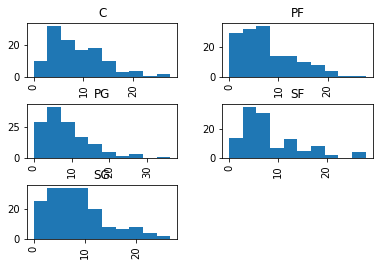

In [0]:
PTS['PTS'].hist(by=PTS['Pos'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a260e10b8>,
      dtype=object)

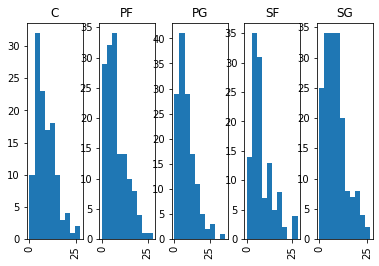

In [0]:
PTS['PTS'].hist(by=PTS['Pos'], layout=(1,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a260f5cf8>,
      dtype=object)

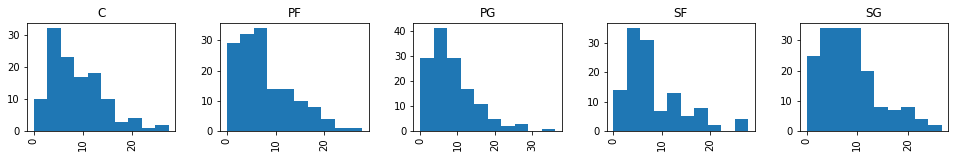

In [0]:
PTS['PTS'].hist(by=PTS['Pos'], layout=(1,5), figsize=(16,2))


#### **Seaborn data visualization**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


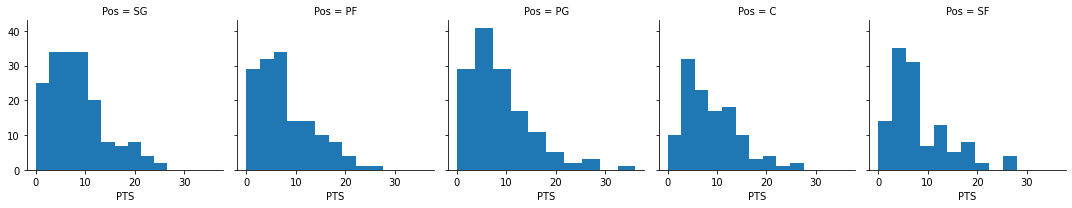

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(PTS, col="Pos")
g.map(plt.hist, "PTS");

### **Box plots**

#### **Box plot of points scored (PTS) grouped by Position**

##### **pandas built-in visualization**

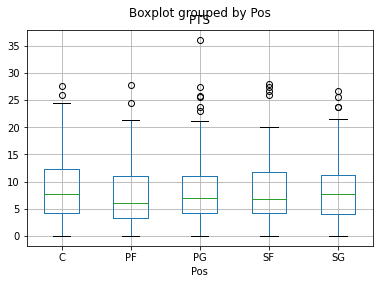

In [0]:
PTS.boxplot(column='PTS', by='Pos')

##### **Seaborn data visualization**

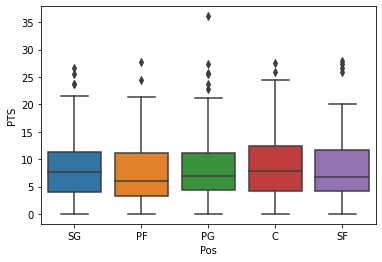

In [0]:
import seaborn as sns

sns.boxplot(x = 'Pos', y = 'PTS', data = PTS) 

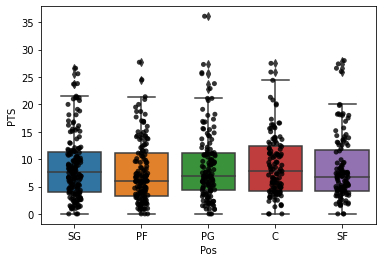

In [0]:
sns.boxplot(x = 'Pos', y = 'PTS', data = PTS) 
sns.stripplot(x = 'Pos', y = 'PTS', data = PTS,
              jitter=True, 
              marker='o',
              alpha=0.8, 
              color="black")

### **Heat map**

#### Compute the correlation matrix

In [0]:
corr = df.corr()
corr

Age         G        GS  ...       TOV        PF       PTS
Age  1.000000  0.067822  0.040582  ...  0.063740  0.108226  0.081915
G    0.067822  1.000000  0.641484  ...  0.473385  0.475785  0.534349
GS   0.040582  0.641484  1.000000  ...  0.649941  0.537722  0.720953
MP   0.146543  0.617229  0.764661  ...  0.766357  0.730804  0.875831
FG   0.058213  0.541442  0.724611  ...  0.830099  0.624156  0.990014
..        ...       ...       ...  ...       ...       ...       ...
STL  0.080757  0.404403  0.566980  ...  0.628718  0.528054  0.637628
BLK  0.012428  0.338509  0.424585  ...  0.368996  0.563042  0.428259
TOV  0.063740  0.473385  0.649941  ...  1.000000  0.602627  0.833448
PF   0.108226  0.475785  0.537722  ...  0.602627  1.000000  0.612860
PTS  0.081915  0.534349  0.720953  ...  0.833448  0.612860  1.000000

[26 rows x 26 columns]

#### Make the heat map

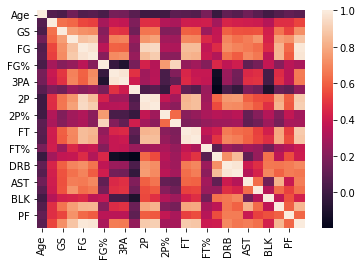

In [0]:
sns.heatmap(corr)

#### Adjust figure size of heat map

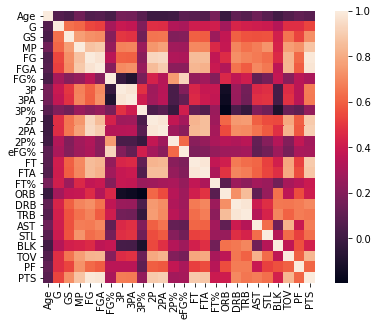

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, square=True)

#### Mask diagonal half of heat map (Diagonal correlation matrix)

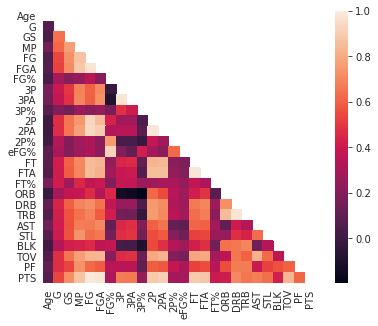

In [0]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

import numpy as np
import seaborn as sns

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)

### **Scatter Plot**

In [0]:
df

Player Pos  Age   Tm   G  GS  ...  AST  STL  BLK  TOV   PF   PTS
0    Álex Abrines  SG   25  OKC  31   2  ...  0.6  0.5  0.2  0.5  1.7   5.3
1      Quincy Acy  PF   28  PHO  10   0  ...  0.8  0.1  0.4  0.4  2.4   1.7
2    Jaylen Adams  PG   22  ATL  34   1  ...  1.9  0.4  0.1  0.8  1.3   3.2
3    Steven Adams   C   25  OKC  80  80  ...  1.6  1.5  1.0  1.7  2.6  13.9
4     Bam Adebayo   C   21  MIA  82  28  ...  2.2  0.9  0.8  1.5  2.5   8.9
..            ...  ..  ...  ...  ..  ..  ...  ...  ...  ...  ...  ...   ...
703  Tyler Zeller   C   29  MEM   4   1  ...  0.8  0.3  0.8  1.0  4.0  11.5
704    Ante Žižić   C   22  CLE  59  25  ...  0.9  0.2  0.4  1.0  1.9   7.8
705   Ivica Zubac   C   21  TOT  59  37  ...  1.1  0.2  0.9  1.2  2.3   8.9
706   Ivica Zubac   C   21  LAL  33  12  ...  0.8  0.1  0.8  1.0  2.2   8.5
707   Ivica Zubac   C   21  LAC  26  25  ...  1.5  0.4  0.9  1.4  2.5   9.4

[708 rows x 29 columns]

#### Select columns if they have numerical data types

In [0]:
df.select_dtypes(include=['number'])

Age   G  GS    MP   FG   FGA    FG%  ...  TRB  AST  STL  BLK  TOV   PF   PTS
0     25  31   2  19.0  1.8   5.1  0.357  ...  1.5  0.6  0.5  0.2  0.5  1.7   5.3
1     28  10   0  12.3  0.4   1.8  0.222  ...  2.5  0.8  0.1  0.4  0.4  2.4   1.7
2     22  34   1  12.6  1.1   3.2  0.345  ...  1.8  1.9  0.4  0.1  0.8  1.3   3.2
3     25  80  80  33.4  6.0  10.1  0.595  ...  9.5  1.6  1.5  1.0  1.7  2.6  13.9
4     21  82  28  23.3  3.4   5.9  0.576  ...  7.3  2.2  0.9  0.8  1.5  2.5   8.9
..   ...  ..  ..   ...  ...   ...    ...  ...  ...  ...  ...  ...  ...  ...   ...
703   29   4   1  20.5  4.0   7.0  0.571  ...  4.5  0.8  0.3  0.8  1.0  4.0  11.5
704   22  59  25  18.3  3.1   5.6  0.553  ...  5.4  0.9  0.2  0.4  1.0  1.9   7.8
705   21  59  37  17.6  3.6   6.4  0.559  ...  6.1  1.1  0.2  0.9  1.2  2.3   8.9
706   21  33  12  15.6  3.4   5.8  0.580  ...  4.9  0.8  0.1  0.8  1.0  2.2   8.5
707   21  26  25  20.2  3.8   7.2  0.538  ...  7.7  1.5  0.4  0.9  1.4  2.5   9.4

[708 rows x 26 columns]

#### Select the first 5 columns (by index number)

In [0]:
number = df.select_dtypes(include=['number'])

In [0]:
number.iloc[:,:5]

Age   G  GS    MP   FG
0     25  31   2  19.0  1.8
1     28  10   0  12.3  0.4
2     22  34   1  12.6  1.1
3     25  80  80  33.4  6.0
4     21  82  28  23.3  3.4
..   ...  ..  ..   ...  ...
703   29   4   1  20.5  4.0
704   22  59  25  18.3  3.1
705   21  59  37  17.6  3.6
706   21  33  12  15.6  3.4
707   21  26  25  20.2  3.8

[708 rows x 5 columns]

#### Select 5 specific columns (by column names)

In [0]:
selections = ['Age', 'G', 'STL', 'BLK', 'AST', 'PTS']
df5 = df[selections]
df5

Age   G  STL  BLK  AST   PTS
0     25  31  0.5  0.2  0.6   5.3
1     28  10  0.1  0.4  0.8   1.7
2     22  34  0.4  0.1  1.9   3.2
3     25  80  1.5  1.0  1.6  13.9
4     21  82  0.9  0.8  2.2   8.9
..   ...  ..  ...  ...  ...   ...
703   29   4  0.3  0.8  0.8  11.5
704   22  59  0.2  0.4  0.9   7.8
705   21  59  0.2  0.9  1.1   8.9
706   21  33  0.1  0.8  0.8   8.5
707   21  26  0.4  0.9  1.5   9.4

[708 rows x 6 columns]

#### Make scatter plot grid

##### 5 columns

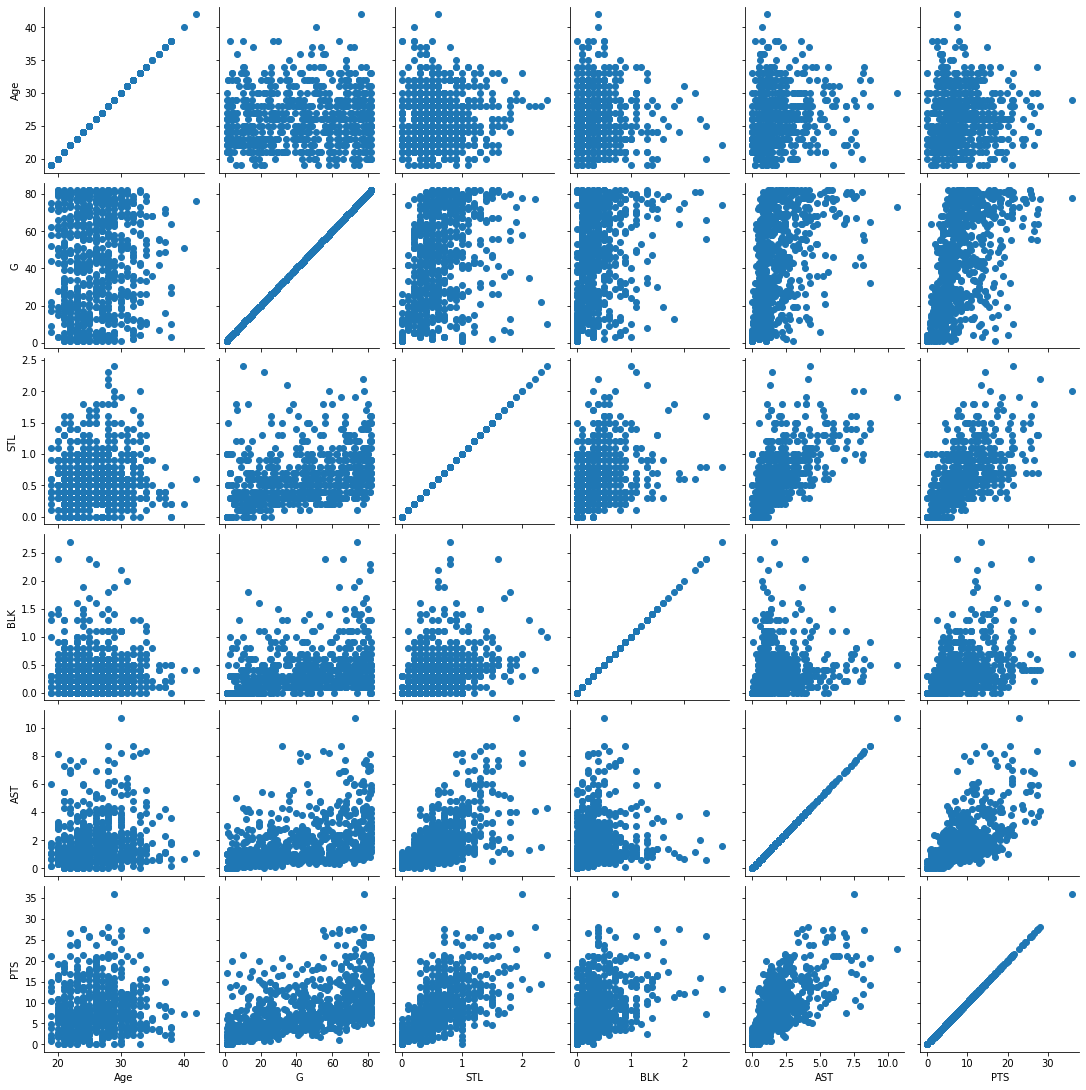

In [0]:
import seaborn as sns

g = sns.PairGrid(df5)
g.map(plt.scatter);

##### All columns

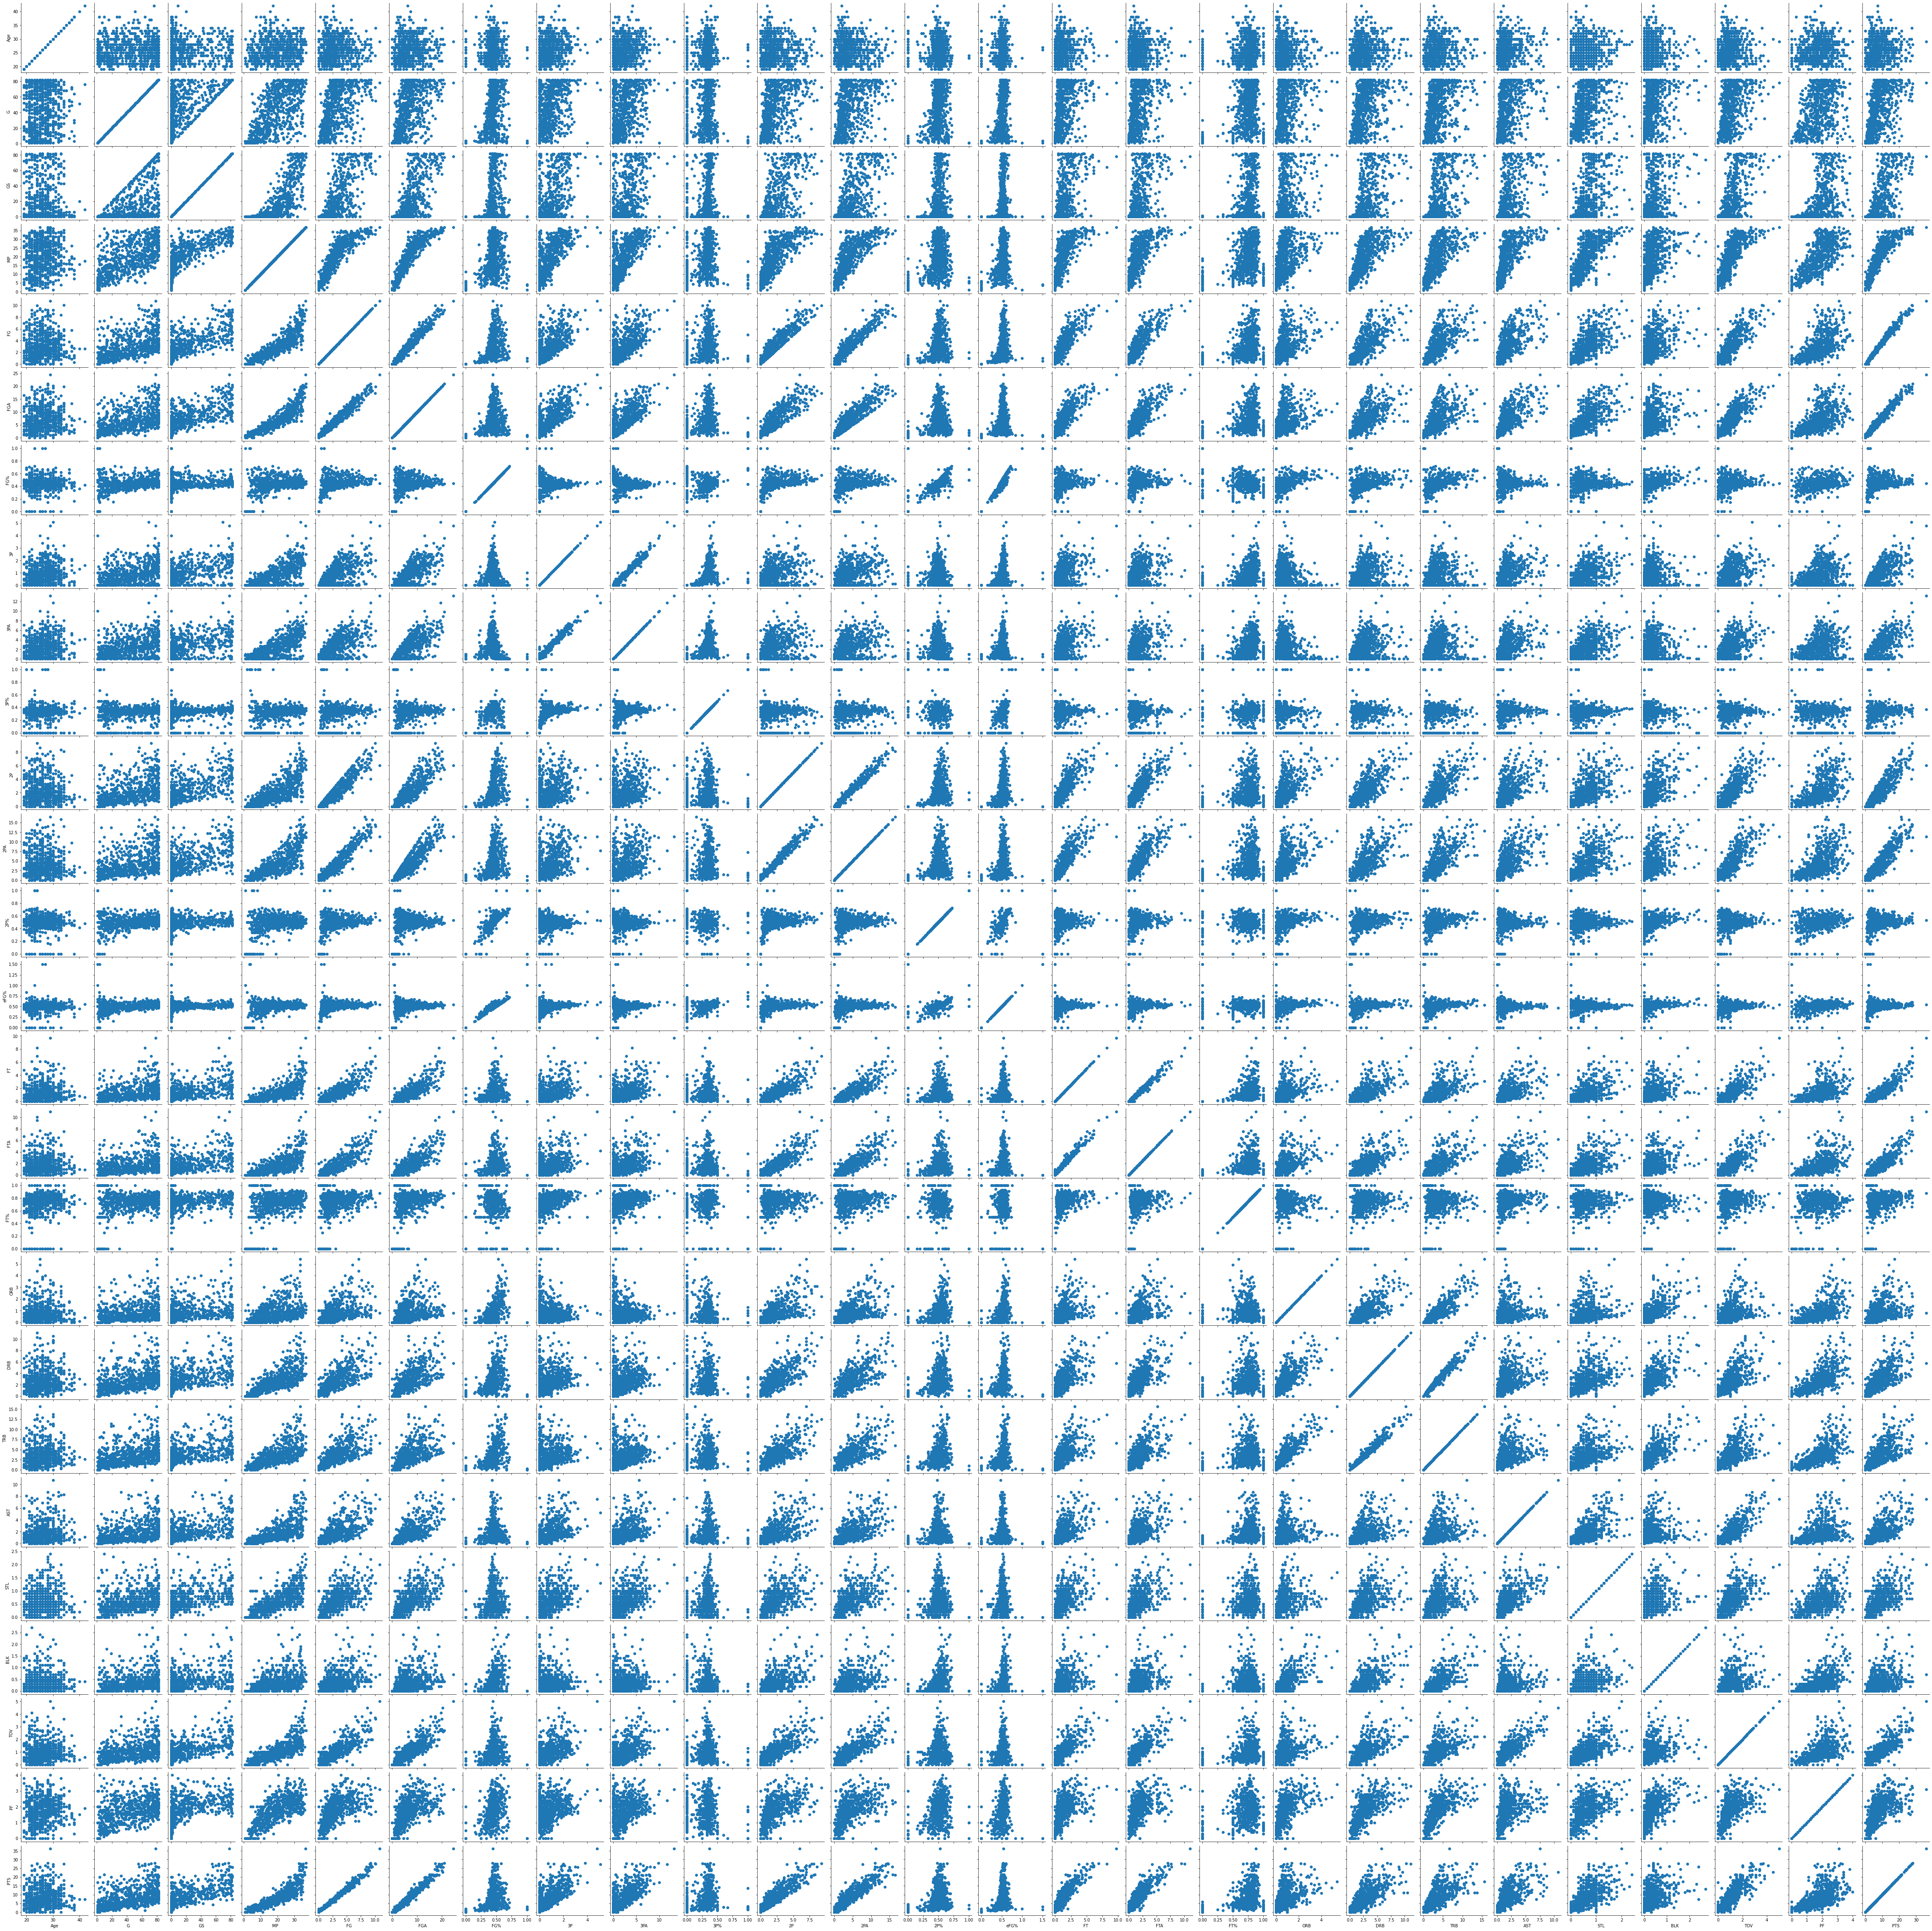

In [0]:
import seaborn as sns

g = sns.PairGrid(number)
g.map(plt.scatter);